In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch

Look at just one patient for axial data.

In [3]:
axial_array_0000 = np.load("MRNet-v1.0/train/axial/0000.npy")

print("Shape:", axial_array_0000.shape)
print("Data type:", axial_array_0000.dtype)

print("Minimum pixel value:", axial_array_0000.min())
print("Maximum pixel value:", axial_array_0000.max())

unique_values = np.unique(axial_array_0000)
print("Number of unique values:", len(unique_values))

Shape: (44, 256, 256)
Data type: uint8
Minimum pixel value: 0
Maximum pixel value: 255
Number of unique values: 256


For patient zero we have 44 layers. The images are greyscale so channel dimension is 1. Intensity ranges from 0 (black) to 255 (white). 

Look at what a single slice looks like.

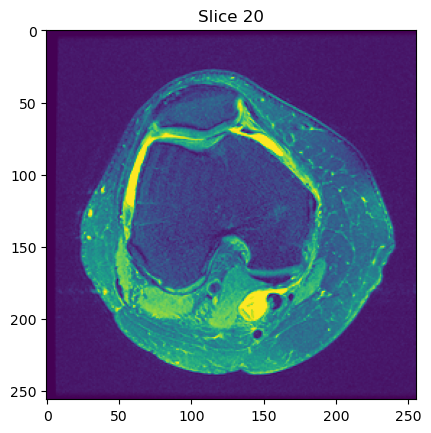

In [4]:
# Suppose 'axial_array_0000' has shape (44, 256, 256)
slice_index = 20  # or any valid index in [0..43]
single_slice = axial_array_0000[slice_index]

plt.imshow(single_slice)  # This displays the 2D data as an image
plt.title(f"Slice {slice_index}")
plt.show()

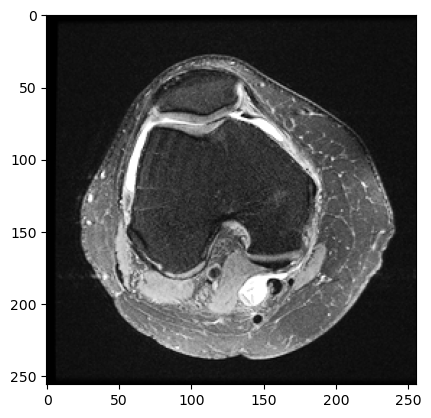

In [5]:
plt.imshow(single_slice, cmap="gray")
plt.show()

Now the same with Coronal and Sagittal

In [6]:
coronal_array_0000 = np.load("MRNet-v1.0/train/coronal/0000.npy")
sagittal_array_0000 = np.load("MRNet-v1.0/train/sagittal/0000.npy")

print("Coronal Shape:", coronal_array_0000.shape)
print("Data type:", coronal_array_0000.dtype)

print("Minimum pixel value:", coronal_array_0000.min())
print("Maximum pixel value:", coronal_array_0000.max())

unique_values = np.unique(coronal_array_0000)
print("Number of unique values:", len(unique_values))

Coronal Shape: (36, 256, 256)
Data type: uint8
Minimum pixel value: 0
Maximum pixel value: 255
Number of unique values: 256


Coronal data is the same in terms of data type and having a good range of pixel values. But we see it has a different number of layers 's'. Between scan angles the number of layers changes. 

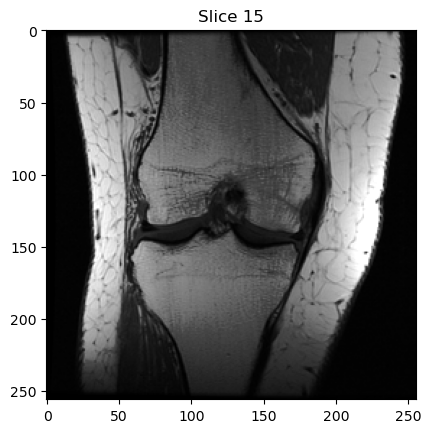

In [7]:
# Suppose 'axial_array_0000' has shape (44, 256, 256)
slice_index = 15  # or any valid index in [0..43]
single_slice = coronal_array_0000[slice_index]

plt.imshow(single_slice, cmap="gray")  # This displays the 2D data as an image
plt.title(f"Slice {slice_index}")
plt.show()

In [8]:
print("Sagittal Shape:", sagittal_array_0000.shape)
print("Data type:", sagittal_array_0000.dtype)

print("Minimum pixel value:", sagittal_array_0000.min())
print("Maximum pixel value:", sagittal_array_0000.max())

unique_values = np.unique(sagittal_array_0000)
print("Number of unique values:", len(unique_values))

Sagittal Shape: (36, 256, 256)
Data type: uint8
Minimum pixel value: 0
Maximum pixel value: 255
Number of unique values: 256


Coronal and Sagittal have the same number of layers for patient 0000.

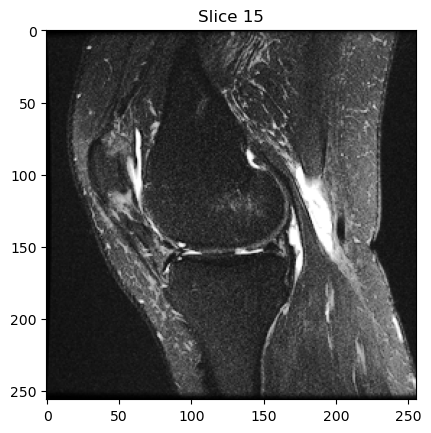

In [9]:
# Suppose 'axial_array_0000' has shape (44, 256, 256)
slice_index = 15  # or any valid index in [0..43]
single_slice = sagittal_array_0000[slice_index]

plt.imshow(single_slice, cmap="gray")  # This displays the 2D data as an image
plt.title(f"Slice {slice_index}")
plt.show()

Now how does it compare between patients? 

In [10]:
axial_array_0001 = np.load("MRNet-v1.0/train/axial/0001.npy")
coronal_array_0001 = np.load("MRNet-v1.0/train/coronal/0001.npy")
sagittal_array_0001 = np.load("MRNet-v1.0/train/coronal/0001.npy")

In [11]:
print("Axial array shape for patient 0001 is", axial_array_0000.shape)
print("Coronal array shape for patient 0001 is", coronal_array_0001.shape)
print("Sagittal array shape for patient 0001 is", sagittal_array_0001.shape)

Axial array shape for patient 0001 is (44, 256, 256)
Coronal array shape for patient 0001 is (20, 256, 256)
Sagittal array shape for patient 0001 is (20, 256, 256)


We notice that the number of layers vary between patients as well as between the angles. The report on the data says the number of layers varies from 17 to 61 with mean of 31.48.

In [12]:
df_label_abnormal = pd.read_csv("MRNet-v1.0/train-abnormal.csv")
df_label_acl = pd.read_csv("MRNet-v1.0/train-acl.csv")
df_label_meniscus = pd.read_csv("MRNet-v1.0/train-meniscus.csv")

In [13]:
df_label_abnormal.head()

,0000,1
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
